<a href="https://colab.research.google.com/github/patrickns/coursera_captsone/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USE OF MACHINE LEARNING FOR REAL ESTATE PROPERTY RECOMMANDATION 

### Abstract

In capstone project , we observed how data science and machine learning approaches can be employed in the real estate industry. decisions to Buy properties are heavily influenced by the location of the houses. We showed how Python libraries such as Pandas can be used to statistically analyze the properties. we used data from FOURSQUARE to enrich the data with information on access to different facilities (venues) and used that to compare, score and rank the properties. The shortlist we arrived at can be used for field visits.

We conclude with a forward thinking approach to turn this into a recommendation model and suggest scope for future work in this area.


### PROBLEM STATEMENT 

With increased access to Internet through personal computers and mobile devices, many individuals turn to the Web to search for items of interest to them. However, the search for rental or buying  properties can be a challenging task. Prospective tenants may spend a significant amount of time exploring various websites advertising properties for rent. Yuan, Lee, Kim and Kim (2013) found that searching real estate assets online does not benefit homebuyers in terms of time, flexibility and intuitive results. 
Search engines generally do a good job by helping users find what they are looking for, however many people find it hard to match their preferences to a query that is likely to produce the desired search results, Viappiani and Faltings (2006) and Viappiani et al., (2006). Using recommender systems technology can address the problem of mapping user’s preferences to items that are likely to meet them (Viappiani et. al, 2006). 
A recommender system can be defined as any system that produces individualised recommendations as output or has the effect of guiding the user in a personalised way to interesting or useful objects in a large space of possible options, Burke (2002). Automated recommender systems emerged early 1990s. A good example is Amazon that uses the collaborative filtering approach in making recommendations on the basis of the current user's behaviour and that of other similar users, Ekstrand, Riedl and Konstan (2010). Netflix uses a combination of content-based filtering and collaborative filtering to make recommendations based on the current user’s preferences and those of similar users.
Traditional approaches such as collaborative filtering and content-based filtering are not suitable for high-value items such as electronics, vehicles and real estate assets since they are not purchased as frequently as are other objects. Consequently, buyers are not able to leave a sufficient number of reviews (ratings) on this objects to facilitate useful recommendation to other users, who may not be satisfied with years-old ratings, according to Felferning, Friedrich, Jannach and Zanker (2011). Knowledge-based recommender systems address this challenge by exploiting explicit user's requirements and the underlying product domain knowledge to generate recommendations, Felfering et al (2011).


## METHODOLOGY 

**Data collection** 

Housing data, collected from NY city website , came in a few CSV files of different sizes. Data was read using pandas as DataFrame objects. These DataFrames form the bedrock of both spatial and attribute analyses. The CSV files were merged to obtain an initial list of about 700  properties.

**Data Cleaning**

An initial and critical step in any data analysis and machine learning project is wrangling and cleaning of the data. In this case, the data suffers from duplicate sand  illegal characters in column names,
We use Pandas to clean our data and come with a dataset of 626 rows to be used in our data analysis. 

**DATA ANALYSIS**

Exploratory analysis 
We used pandas to Explore the distribution of numeric columns and used folium libraries to visually analyze our data 
Running an Initial Shortlist
Basing on the houses’ intrinsic features, we were able to build the first shortlist, the shortlist reduces the number of eligible properties from 626 to 258. When plotted on a map, these properties are spread across Brooklyn.
Quantifying Access
When buying a house, you are looking for proximity to services such as groceries, pharmacies, urgent care facilities, restaurant, spa and parks. The FOURSQUARE developer API was used to search for such facilities within a specified distance around a house.  

**Properties Scoring**

Evaluating houses is a deeply personal process. Different buyers look for different characteristics in a house. Not all aspects are considered equally, so assigning different weights for features will let you arrive at a weighted sum (a score) for each house. The higher the score, the more desirable a house is to you. We used a scoring function that reflects the relative importance of each feature in a house. Desirable attributes are weighted positively, while undesirable attributes are weighted negatively.

**Data Scaling**


While a scoring function can be extremely handy in comparing the features of shortlisted houses, when applied directly (without any scaling), it returns a set of scores that are heavily influenced by a small number of attributes that have numerically large values. For instance, an attribute such as property price tends to be a large number (hundreds of thousands) compared to the number of bedrooms (which will likely be less than 10). Without scaling, property price will dominate the score beyond its allotted weight. Scores computed without scaling appear extremely correlated with the property price variable. While property price is an important consideration for most buyers, it cannot be the only criteria that determines a property’s rank.
To rectify this and compute a new set of scores, all numerical columns were scaled to a uniform range of 0–1 using the MinMaxScaler function from scikit-learn library. 

**Properties Ranking**


Once the properties were scored, they were sorted in descending order and assigned a rank, creating a refined shortlist of homes that could be visited. In this example, the top 50 houses are spread across Brooklyn. 


**Building a Housing Recommendation Model**

So far, the dataset was feature engineered with intrinsic and spatial attributes. Weights for different features were explicitly defined so properties could be scored and ranked. In reality, the decision-making process for buyers, although logical, is less calculated and a bit fuzzier. Buyers are likely to be content with certain shortcomings (e.g., fewer units) if they are highly impressed with some other characteristic (e.g., size ). If buyers simply favor some houses and blacklist others, you could let a machine learning model infer their preferences.
Since it is difficult to collect this kind of training data for a large number of properties, a mock dataset was synthesized using the top 50 houses as the favorite group and the remaining as the blacklisted group. 
This data was fed to a machine learning logistic regression model. As this model learns from the training data, it attempts to assign weights to each predictor variable (intrinsic and spatial features)
and predict whether that house will be preferred by a buyer. As a new property hits the market, this model can predict whether a buyer would like it and present only relevant results.


# RESULTS 

#  1. Data cleaning 

This dataset has been extracted from DOF Condominium Comparable Rental Income from Brooklyn in the fiscal year 2011_2012

In [1]:
# Let us import needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline


In [2]:
# read dataset hosted on our GITHUB repository 
df=pd.read_csv('https://raw.githubusercontent.com/patrickns/coursera_captsone/main/dataset.csv')
df.head()

,city,bourgh,Neighborhood,Address,address_full,Building_Classification,Total_Units,Year_Built,Size,Value,Latitude,Longitude
0,New york,brooklyn,DOWNTOWN-FULTON FERRY,1 MAIN STREET,"1 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,124,1913.0,227916,23759904,40.703629,-73.990410
1,New york,brooklyn,DOWNTOWN-FULTON FERRY,31 WASHINGTON STREET,"31 WASHINGTON STREET,DOWNTOWN-FULTON FERRY,bro...",R4-CONDOMINIUM,13,2001.0,24672,2346000,40.703386,-73.989361
2,New york,brooklyn,DOWNTOWN-FULTON FERRY,133 WATER STREET,"133 WATER STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,69,2006.0,78352,8488003,40.703362,-73.989044
3,New york,brooklyn,DOWNTOWN-FULTON FERRY,50 BRIDGE STREET,"50 BRIDGE STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,58,1904.0,52530,4003003,40.703105,-73.984828
4,New york,brooklyn,DOWNTOWN-FULTON FERRY,4 WATER STREET,"4 WATER STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,13,2007.0,20085,2107998,40.703126,-73.993609


In [3]:
# check the shape of our dataset
df.shape

(717, 12)

## 1.1 Remove Unnecessary columns 

We have two similar address colomums , let us remove one 

In [4]:
df.drop(columns=['Address'], inplace=True)
df.columns

Index(['city', 'bourgh', 'Neighborhood', 'address_full',
       'Building_Classification', 'Total_Units', 'Year_Built', 'Size', 'Value',
       'Latitude', 'Longitude'],
      dtype='object')

## 1.2 Find and fill missing values

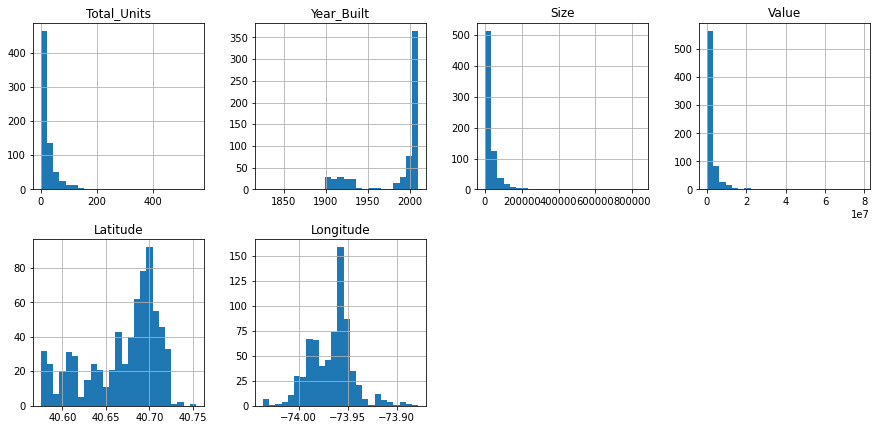

In [5]:
# explore distribution of numeric columns
ax_list = df.hist(bins=25, layout=(4,4), figsize=(15,15))

In [6]:
# drop rows with missing values in critical columns
df2 = df.dropna(axis=0, how='any', # if any of these cols are empty, remove row
                              subset=['Year_Built'])
df2.shape

(626, 11)

# 2.Exploratory Data Analysis

## 2.1 Explore distribution of numeric columns

In [7]:
df2.describe().round(3)

,Total_Units,Year_Built,Size,Value,Latitude,Longitude
count,626.000,626.000,626.000,6.260000e+02,626.000,626.000
mean,31.784,1983.906,37929.869,3.021241e+06,40.668,-73.966
std,52.002,36.757,62310.545,5.295208e+06,0.043,0.023
min,1.000,1825.000,478.000,3.000000e+04,40.575,-74.036
25%,12.000,1987.250,13131.250,1.022500e+06,40.638,-73.983
50%,16.000,2004.000,21629.500,1.736499e+06,40.685,-73.961
75%,30.000,2006.000,36902.750,2.797000e+06,40.701,-73.953
max,552.000,2010.000,842968.000,7.898899e+07,40.754,-73.878


## 2.2 Visualize spatially

In [8]:
! pip install folium==0.5.0
import folium # plotting library

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp36-none-any.whl size=76240 sha256=f3a771abfdb6d1562dc3f558a0a2f3d7001196e823f317e8e602f3e00544e8f3
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [9]:
df2.rename(index=str, columns={'Longitude':'X', 'Latitude':'Y'}, inplace=True)
df2.columns

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['city', 'bourgh', 'Neighborhood', 'address_full',
       'Building_Classification', 'Total_Units', 'Year_Built', 'Size', 'Value',
       'Y', 'X'],
      dtype='object')

In [16]:
# Brooklyn latitude and longitude values
latitude =  40.678
longitude = -73.944

In [17]:
# create map and display it
brooklyn_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
brooklyn_map

In [18]:
# instantiate a feature group for the apartment in the dataframe
property = folium.map.FeatureGroup()

# loop through the buidling apartment and add each to the apartment feature group
for lat, lng, in zip(df2.Y, df2.X):
    property.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add apartment to map
brooklyn_map.add_child(property)

## 2.3 Explore the frequency of categorical columns

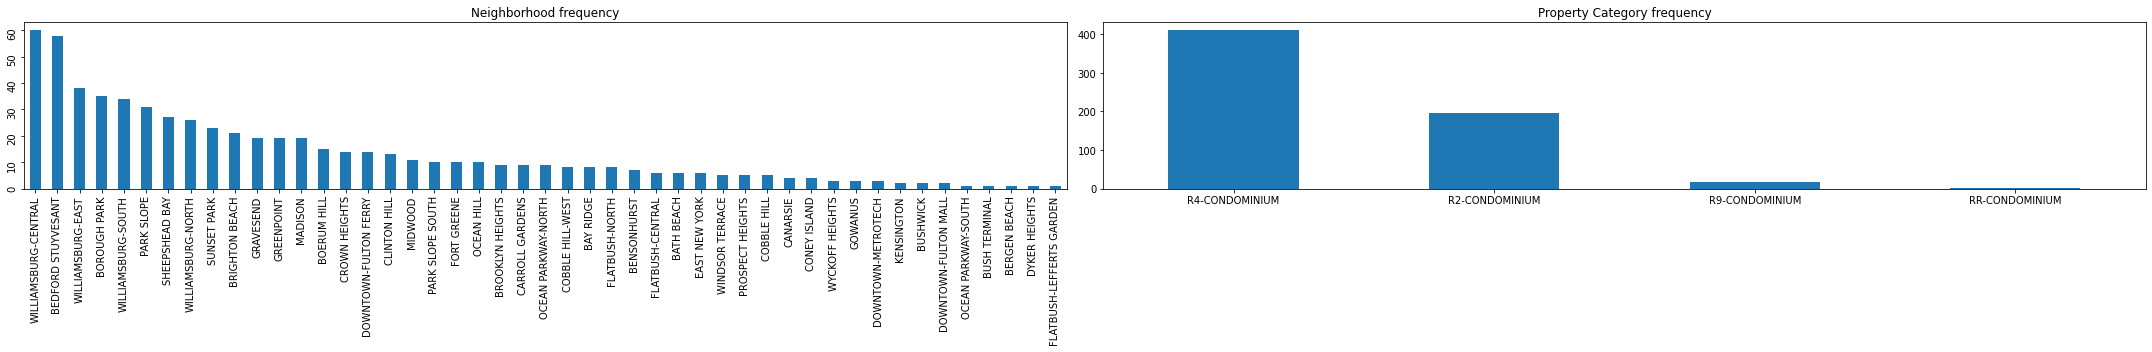

In [19]:
fig2, ax2 = plt.subplots(1,2, figsize=(30,5))

df2['Neighborhood'].value_counts().plot(kind='bar', ax=ax2[0], 
                                             title='Neighborhood frequency')
ax2[0].tick_params(labelrotation=90)

df2['Building_Classification'].value_counts().plot(kind='bar', ax=ax2[1], 
                                             title='Property Category frequency')
ax2[1].tick_params(labelrotation=0)
plt.tight_layout()

## 2.4 Property filtering

Based on our need , we opted to filter property based on two criteria : Year built and the number of units focusing on new properties built after 1900 and with units above 20

In [20]:
df3 =df2[(df2['Year_Built']>=1900) & 
                       (df2['Total_Units']>=20)]
df3.shape

(258, 11)

## 2.5 Visualize Shortilisted Properties

In [21]:
# instantiate a feature group for the apartment in the dataframe
properties = folium.map.FeatureGroup()

# loop through the shortilisted properties and add each to the property feature group
for lat, lng, in zip(df3.Y, df3.X):
    properties.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=8, 
            color='green',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add shortilisted properties to map
brooklyn_map.add_child(properties)

# 3. Analysis of Neigborhood around selected properties 

## 3.1 Collect Neigborhood information from Foursquare

In [22]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'U2HPOBQ43KQOVQBIQVSPOXOVXIZOBRW2LQU1THDQ0G5X5DFK' #  ID
CLIENT_SECRET = 'VOPFTEDJQPIE0YUYCVZAASW3DVKLQLP5RJL4OKA2JAUCXD2U' # Secret
VERSION = '20180604'
LIMIT = 30

In [23]:
# import libraries
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

Let us add Name to our properties 

In [25]:
df4=pd.read_csv('https://raw.githubusercontent.com/patrickns/coursera_captsone/main/prop_name.csv')
df4.head()

,address_full,Name
0,"1 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",Prop001
1,"31 WASHINGTON STREET,DOWNTOWN-FULTON FERRY,bro...",Prop002
2,"133 WATER STREET,DOWNTOWN-FULTON FERRY,brookly...",Prop003
3,"50 BRIDGE STREET,DOWNTOWN-FULTON FERRY,brookly...",Prop004
4,"4 WATER STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",Prop005


In [26]:
df5=pd.merge(df3, df4, how="left", on=["address_full"])
df5.head()

,city,bourgh,Neighborhood,address_full,Building_Classification,Total_Units,Year_Built,Size,Value,Y,X,Name
0,New york,brooklyn,DOWNTOWN-FULTON FERRY,"1 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,124,1913.0,227916,23759904,40.703629,-73.990410,Prop001
1,New york,brooklyn,DOWNTOWN-FULTON FERRY,"133 WATER STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,69,2006.0,78352,8488003,40.703362,-73.989044,Prop003
2,New york,brooklyn,DOWNTOWN-FULTON FERRY,"50 BRIDGE STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,58,1904.0,52530,4003003,40.703105,-73.984828,Prop004
3,New york,brooklyn,DOWNTOWN-FULTON FERRY,"30 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,87,1910.0,158053,15924001,40.702988,-73.990780,Prop006
4,New york,brooklyn,DOWNTOWN-FULTON FERRY,"42 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,21,1910.0,23150,2896003,40.702657,-73.990820,Prop007


Let us get a lsit of all venues by Name

In [27]:
brooklyn_venues = getNearbyVenues(names=df5['Name'],
                                   latitudes=df3['Y'],
                                   longitudes=df3['X']
                                  )

Prop001
Prop003
Prop004
Prop006
Prop007
Prop009
Prop010
Prop011
Prop012
Prop014
Prop015
Prop017
Prop018
Prop019
Prop022
Prop023
Prop027
Prop028
Prop029
Prop030
Prop031
Prop032
Prop036
Prop037
Prop038
Prop041
Prop042
Prop044
Prop045
Prop047
Prop052
Prop053
Prop054
Prop055
Prop058
Prop062
Prop064
Prop065
Prop066
Prop068
Prop070
Prop072
Prop075
Prop076
Prop077
Prop081
Prop082
Prop085
Prop092
Prop095
Prop107
Prop108
Prop109
Prop112
Prop117
Prop120
Prop121
Prop124
Prop125
Prop127
Prop129
Prop132
Prop141
Prop142
Prop145
Prop147
Prop150
Prop151
Prop152
Prop153
Prop155
Prop158
Prop164
Prop165
Prop166
Prop169
Prop173
Prop176
Prop179
Prop183
Prop184
Prop185
Prop186
Prop188
Prop194
Prop195
Prop196
Prop199
Prop201
Prop226
Prop234
Prop237
Prop239
Prop240
Prop262
Prop266
Prop268
Prop270
Prop274
Prop277
Prop278
Prop283
Prop285
Prop288
Prop290
Prop292
Prop293
Prop294
Prop295
Prop297
Prop299
Prop300
Prop301
Prop306
Prop311
Prop316
Prop317
Prop318
Prop326
Prop329
Prop335
Prop346
Prop371
Prop372
Prop377


In [28]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(6804, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Prop001,40.703629,-73.99041,Pebble Beach,40.704329,-73.990265,Beach
1,Prop001,40.703629,-73.99041,DUMBO Boulders,40.704192,-73.988930,Climbing Gym
2,Prop001,40.703629,-73.99041,Jane's Carousel,40.704288,-73.992399,Theme Park Ride / Attraction
3,Prop001,40.703629,-73.99041,Butler Bakeshop,40.703295,-73.992526,Café
4,Prop001,40.703629,-73.99041,sweetgreen,40.702812,-73.989833,Salad Place


Let's find out how many unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 302 uniques categories.


## 3.2 Analyze Each Neighborhood

In [30]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Property'] = brooklyn_venues['Neighborhood'] 

# move property  column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Property,ATM,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,...,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Track Stadium,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Prop001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Prop001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Prop001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Prop001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Prop001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
brooklyn_onehot.shape

(6804, 303)

## 3.3 Groupe venues per property

In [32]:
brooklyn_grouped = brooklyn_onehot.groupby('Property').mean().reset_index()
brooklyn_grouped

,Property,ATM,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,...,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Track Stadium,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Prop001,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333
1,Prop003,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.000000,0.0,0.0,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667
2,Prop004,0.0,0.0,0.0,0.066667,0.0,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.000000,0.0,0.0,0.0,0.033333,0.033333,0.000000,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667
3,Prop006,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000
4,Prop007,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Prop697,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.066667,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [33]:
df5.rename(columns={'Name':'Property'
                          }, 
                 inplace=True)

In [34]:
df6=pd.merge(df5, brooklyn_grouped, how="left", on=["Property"])
df6.head()

,city,bourgh,Neighborhood_x,address_full,Building_Classification,Total_Units,Year_Built,Size,Value,Y,X,Property,ATM,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,...,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Track Stadium,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,New york,brooklyn,DOWNTOWN-FULTON FERRY,"1 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,124,1913.0,227916,23759904,40.703629,-73.990410,Prop001,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333
1,New york,brooklyn,DOWNTOWN-FULTON FERRY,"133 WATER STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,69,2006.0,78352,8488003,40.703362,-73.989044,Prop003,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667
2,New york,brooklyn,DOWNTOWN-FULTON FERRY,"50 BRIDGE STREET,DOWNTOWN-FULTON FERRY,brookly...",R4-CONDOMINIUM,58,1904.0,52530,4003003,40.703105,-73.984828,Prop004,0.0,0.0,0.0,0.066667,0.0,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667
3,New york,brooklyn,DOWNTOWN-FULTON FERRY,"30 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,87,1910.0,158053,15924001,40.702988,-73.990780,Prop006,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000
4,New york,brooklyn,DOWNTOWN-FULTON FERRY,"42 MAIN STREET,DOWNTOWN-FULTON FERRY,brooklyn,NY",R4-CONDOMINIUM,21,1910.0,23150,2896003,40.702657,-73.990820,Prop007,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000


## 3.4 Selection of  important venues for our property categorization 

In [35]:
df7=df6[['city','Property', 'Neighborhood_x', 'Building_Classification', 'Year_Built', 'Size', 'Value', 'Total_Units', 'Gym', 'Bar', 'School', 'Park', 'American Restaurant', 'Spa', 'ATM', 'Playground']]

In [36]:
df7.head()

,city,Property,Neighborhood_x,Building_Classification,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground
0,New york,Prop001,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,1913.0,227916,23759904,124,0.066667,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333
1,New york,Prop003,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,2006.0,78352,8488003,69,0.066667,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333
2,New york,Prop004,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,1904.0,52530,4003003,58,0.066667,0.033333,0.0,0.066667,0.066667,0.0,0.0,0.000000
3,New york,Prop006,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,1910.0,158053,15924001,87,0.033333,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333
4,New york,Prop007,DOWNTOWN-FULTON FERRY,R4-CONDOMINIUM,1910.0,23150,2896003,21,0.033333,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333


In [37]:
df7.shape

(260, 16)

In [38]:
df8 = df7.groupby('Property').mean().reset_index()
df8

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground
0,Prop001,1913.0,227916,23759904,124,0.066667,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
1,Prop003,2006.0,78352,8488003,69,0.066667,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
2,Prop004,1904.0,52530,4003003,58,0.066667,0.033333,0.0,0.066667,0.066667,0.00,0.0,0.000000
3,Prop006,1910.0,158053,15924001,87,0.033333,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
4,Prop007,1910.0,23150,2896003,21,0.033333,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Prop700,2002.0,151508,14281997,112,0.038462,0.038462,0.0,0.000000,0.000000,0.00,0.0,0.000000
256,Prop702,1961.0,133505,3763000,118,0.000000,0.000000,0.0,0.000000,0.047619,0.00,0.0,0.000000
257,Prop703,2005.0,26656,1835999,24,0.000000,0.040000,0.0,0.040000,0.000000,0.04,0.0,0.000000
258,Prop710,1994.0,16602,935001,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df8.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [40]:
df8

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground
0,Prop001,1913.0,227916,23759904,124,0.066667,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
1,Prop003,2006.0,78352,8488003,69,0.066667,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
2,Prop004,1904.0,52530,4003003,58,0.066667,0.033333,0.0,0.066667,0.066667,0.00,0.0,0.000000
3,Prop006,1910.0,158053,15924001,87,0.033333,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
4,Prop007,1910.0,23150,2896003,21,0.033333,0.000000,0.0,0.033333,0.033333,0.00,0.0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Prop697,2005.0,152181,14346001,108,0.000000,0.033333,0.0,0.000000,0.000000,0.00,0.0,0.000000
254,Prop699,2007.0,89641,8949001,68,0.052632,0.052632,0.0,0.000000,0.000000,0.00,0.0,0.000000
255,Prop700,2002.0,151508,14281997,112,0.038462,0.038462,0.0,0.000000,0.000000,0.00,0.0,0.000000
256,Prop702,1961.0,133505,3763000,118,0.000000,0.000000,0.0,0.000000,0.047619,0.00,0.0,0.000000


## 3.5 Scale data

Although price plays an important role while selecting properties, the range and valuds of the PRICE column is much larger than any other. Thus, it influences more than its fair share. To resolve this, we scale the data using different techniques.

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [42]:
df8.columns

Index(['Property', 'Year_Built', 'Size', 'Value', 'Total_Units', 'Gym', 'Bar',
       'School', 'Park', 'American Restaurant', 'Spa', 'ATM', 'Playground'],
      dtype='object')

In [43]:
columns_to_scale = ['Value', 'Year_Built', 'Size', 'Total_Units', 'Gym', 'Bar',
       'School', 'Park', 'American Restaurant', 'Spa', 'ATM', 'Playground']

In [44]:
scaled_array = mm_scaler.fit_transform(df8[columns_to_scale])
prop_scaled = pd.DataFrame(scaled_array, columns=columns_to_scale)
prop_scaled.head()

,Value,Year_Built,Size,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground
0,0.294919,0.119266,0.261681,0.195489,0.4,0.000000,0.0,0.175,0.1,0.0,0.0,0.2
1,0.099950,0.972477,0.082142,0.092105,0.4,0.000000,0.0,0.175,0.1,0.0,0.0,0.2
2,0.042692,0.036697,0.051145,0.071429,0.4,0.142857,0.0,0.350,0.2,0.0,0.0,0.0
3,0.194882,0.091743,0.177817,0.125940,0.2,0.000000,0.0,0.175,0.1,0.0,0.0,0.2
4,0.028560,0.091743,0.015877,0.001880,0.2,0.000000,0.0,0.175,0.1,0.0,0.0,0.2


## 3.6 Score and rank properties 

So far we have shortlisted properties based on their intrinsic properties such as number of units, price, Year built , etc. We have enriched them with spatial attributes such as access to facilities (school, park,etc ...). now  we are going to weigh and sum these attributes to produce a score for each property. We finally sort them to pick the top few.

###  Apply weights 


(In the following section, we determine the relative importance of each attribute and set weights accordingly)

In [45]:
def set_scores(row):
    score = ((row['Value']*-1.5) + # penalize by 1.5 times
             (row['Total_Units']*1.5)+
             (row['Size']*1)+
             (row['Year_Built']*1.5)+
             (row['School']*1.5)+
             (row['Bar']*-1)+
             (row['Spa']*1)+  
             (row['American Restaurant']*1)+
             (row['Playground']*1)+
             (row['Park']*1.5)+  # reward by 1.5 times
             (row['Gym']*1)+
             (row['ATM']*1))
                        
    return score

### Generate scores for all properties

In [46]:
%%time
prop_scaled['scores'] = prop_scaled.apply(set_scores, axis=1)

CPU times: user 18.6 ms, sys: 3.13 ms, total: 21.7 ms
Wall time: 22.1 ms


In [47]:
prop_scaled.head()

,Value,Year_Built,Size,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,scores
0,0.294919,0.119266,0.261681,0.195489,0.4,0.000000,0.0,0.175,0.1,0.0,0.0,0.2,1.253935
1,0.099950,0.972477,0.082142,0.092105,0.4,0.000000,0.0,0.175,0.1,0.0,0.0,0.2,2.491590
2,0.042692,0.036697,0.051145,0.071429,0.4,0.142857,0.0,0.350,0.2,0.0,0.0,0.0,1.131438
3,0.194882,0.091743,0.177817,0.125940,0.2,0.000000,0.0,0.175,0.1,0.0,0.0,0.2,0.974518
4,0.028560,0.091743,0.015877,0.001880,0.2,0.000000,0.0,0.175,0.1,0.0,0.0,0.2,0.875971


In [50]:
df8['scores_scaled'] = prop_scaled['scores']
df8.head()

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,scores_scaled
0,Prop001,1913.0,227916,23759904,124,0.066667,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333,1.253935
1,Prop003,2006.0,78352,8488003,69,0.066667,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333,2.491590
2,Prop004,1904.0,52530,4003003,58,0.066667,0.033333,0.0,0.066667,0.066667,0.0,0.0,0.000000,1.131438
3,Prop006,1910.0,158053,15924001,87,0.033333,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333,0.974518
4,Prop007,1910.0,23150,2896003,21,0.033333,0.000000,0.0,0.033333,0.033333,0.0,0.0,0.033333,0.875971


### Sort by scores

In [51]:
prop_df_sorted = df8.sort_values(by='scores_scaled', ascending=False)
prop_df_sorted.head(3)

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,scores_scaled
183,Prop508,1990.0,445921,11848942,552,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,4.047624
211,Prop571,2005.0,28750,2485000,21,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0,0.166667,3.435403
21,Prop032,2008.0,628669,78988986,438,0.0,0.0,0.0,0.1,0.033333,0.000000,0.0,0.100000,3.395062


In [52]:
prop_df_sorted.reset_index(drop=True, inplace=True)
prop_df_sorted.head()

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,scores_scaled
0,Prop508,1990.0,445921,11848942,552,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.000,0.000000,4.047624
1,Prop571,2005.0,28750,2485000,21,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000,0.166667,3.435403
2,Prop032,2008.0,628669,78988986,438,0.0,0.0,0.000000,0.1,0.033333,0.000000,0.000,0.100000,3.395062
3,Prop515,2007.0,30000,3275999,23,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.000,0.045455,3.227646
4,Prop383,2006.0,39038,2998001,27,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.125000,3.218608


### Apply a rank for each property based on the scores

In [53]:
prop_df_sorted['rank'] = prop_df_sorted.index
prop_df_sorted.head(10)

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,scores_scaled,rank
0,Prop508,1990.0,445921,11848942,552,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000,0.000000,4.047624,0
1,Prop571,2005.0,28750,2485000,21,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000,0.166667,3.435403,1
2,Prop032,2008.0,628669,78988986,438,0.000000,0.000000,0.000000,0.100000,0.033333,0.000000,0.000,0.100000,3.395062,2
3,Prop515,2007.0,30000,3275999,23,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000,0.045455,3.227646,3
4,Prop383,2006.0,39038,2998001,27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.125000,3.218608,4
5,Prop372,2000.0,39000,3618992,32,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000,0.083333,3.044450,5
6,Prop509,1990.0,425720,9955968,542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,3.031429,6
7,Prop012,2006.0,301131,35211998,266,0.066667,0.033333,0.000000,0.066667,0.033333,0.000000,0.000,0.033333,2.922355,7
8,Prop642,1964.0,842968,21948992,371,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.033333,2.862696,8
9,Prop329,2001.0,85046,7759011,66,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000,0.117647,2.642938,9


In [55]:
import seaborn as sns

# 4.Building Property recommendation model

So far, we have feature engineered our data set with location specific features. We explicitly defined weights for different attributes and arrived at a rank. Instead, we could simply like and dislike a few houses and let a machine learning model infer our preferences based on that. That is what this notebook tries to do.

Since it is time consuming to like and dislike a large number of properties, we pick the top 50 notebooks from our previous rank and like them all. We dislike the remaining ones

In [58]:
df9=prop_df_sorted

In [59]:
df9.shape

(258, 15)

Generate a prefernce list that is 258 records long. This list has 1 for first 50 records followed by 0.

In [61]:
preference_list = [1]*50
preference_list.extend([0]*(258-50))
len(preference_list)

258

In [62]:
df9['favorite'] = preference_list

Drop rank, scores_scaled columns from DataFrame

In [63]:
df9.drop(columns=['scores_scaled','rank'], inplace=True)
df9.head()

,Property,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,favorite
0,Prop508,1990.0,445921,11848942,552,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.000,0.000000,1
1,Prop571,2005.0,28750,2485000,21,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000,0.166667,1
2,Prop032,2008.0,628669,78988986,438,0.0,0.0,0.000000,0.1,0.033333,0.000000,0.000,0.100000,1
3,Prop515,2007.0,30000,3275999,23,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.000,0.045455,1
4,Prop383,2006.0,39038,2998001,27,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.125000,1


## 4.1 One hot encoding

We drop more columns that don't really determine a buyer's preference

In [64]:
df9.columns

Index(['Property', 'Year_Built', 'Size', 'Value', 'Total_Units', 'Gym', 'Bar',
       'School', 'Park', 'American Restaurant', 'Spa', 'ATM', 'Playground',
       'favorite'],
      dtype='object')

In [65]:
train_df = df9.drop(columns=['Property'])
train_df.head()

,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground,favorite
0,1990.0,445921,11848942,552,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.000,0.000000,1
1,2005.0,28750,2485000,21,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000,0.166667,1
2,2008.0,628669,78988986,438,0.0,0.0,0.000000,0.1,0.033333,0.000000,0.000,0.100000,1
3,2007.0,30000,3275999,23,0.0,0.0,0.045455,0.0,0.000000,0.000000,0.000,0.045455,1
4,2006.0,39038,2998001,27,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.125000,1


### Scale numeric columns

In [66]:
columns_to_scale = ['Year_Built', 'Size', 'Value', 'Total_Units', 'Gym', 'Bar',
       'School', 'Park', 'American Restaurant', 'Spa', 'ATM', 'Playground'
      ]

In [67]:
scaled_array1 = mm_scaler.fit_transform(train_df[columns_to_scale])
prop_scaled1 = pd.DataFrame(scaled_array1, columns=columns_to_scale)
prop_scaled1.head()

,Year_Built,Size,Value,Total_Units,Gym,Bar,School,Park,American Restaurant,Spa,ATM,Playground
0,0.825688,0.523378,0.142858,1.000000,0.0,0.0,0.0,0.000,1.0,0.0,0.0,0.000000
1,0.963303,0.022599,0.023313,0.001880,0.0,0.0,0.0,0.000,0.0,1.0,0.0,1.000000
2,0.990826,0.742752,1.000000,0.785714,0.0,0.0,0.0,0.525,0.1,0.0,0.0,0.600000
3,0.981651,0.024100,0.033411,0.005639,0.0,0.0,1.0,0.000,0.0,0.0,0.0,0.272727
4,0.972477,0.034949,0.029862,0.013158,0.0,0.0,0.0,0.000,0.0,0.0,1.0,0.750000


## 4.2 Split dataset into training and test

In [68]:
prop_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Value                258 non-null    float64
 1   Year_Built           258 non-null    float64
 2   Size                 258 non-null    float64
 3   Total_Units          258 non-null    float64
 4   Gym                  258 non-null    float64
 5   Bar                  258 non-null    float64
 6   School               258 non-null    float64
 7   Park                 258 non-null    float64
 8   American Restaurant  258 non-null    float64
 9   Spa                  258 non-null    float64
 10  ATM                  258 non-null    float64
 11  Playground           258 non-null    float64
 12  scores               258 non-null    float64
dtypes: float64(13)
memory usage: 26.3 KB


In [69]:
X = prop_scaled
y = train_df['favorite']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

(len(X_train), len(X_test))

(172, 86)

## 4.3 Running Logistic Regression model

In [71]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(verbose=1)

In [72]:
log_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [73]:
test_predictions = log_model.predict(X_test)

In [74]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4.4 Model evaluation

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
from pprint import pprint
pprint(classification_report(y_test, test_predictions, target_names=['not fav','fav']))

('              precision    recall  f1-score   support\n'
 '\n'
 '     not fav       0.74      1.00      0.85        64\n'
 '         fav       0.00      0.00      0.00        22\n'
 '\n'
 '    accuracy                           0.74        86\n'
 '   macro avg       0.37      0.50      0.43        86\n'
 'weighted avg       0.55      0.74      0.64        86\n')


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
tn, fp, fn, tp

(64, 0, 22, 0)

## 4.5 Model inference

In [78]:
coeff = log_model.coef_.round(5).tolist()[0]
list(zip(X_train.columns, coeff))

[('Value', 0.86952),
 ('Year_Built', -0.80654),
 ('Size', 0.1225),
 ('Total_Units', 0.47617),
 ('Gym', 0.77884),
 ('Bar', 0.75015),
 ('School', -0.1432),
 ('Park', -0.0917),
 ('American Restaurant', 0.58796),
 ('Spa', 1.04237),
 ('ATM', -0.08805),
 ('Playground', 0.31364),
 ('scores', -0.14505)]

In [79]:
log_model.intercept_

array([-1.27062641])

# 5. Conclusion 

In capstone project , we observed how data science and machine learning approaches can be employed in the real estate industry. decisions to Buy  properties  are heavily influenced by the location of the houses. We showed how Python libraries such as Pandas can be used to statistically analyze the properties. we used data from FOURSQUARE  to  enrich the data with information on access to different facilities (venues)  and used that to compare, score and rank the properties. The shortlist we arrived at can be used for field visits.

We conclude with a forward thinking approach to turn this into a recommendation model and suggest scope for future work in this area.